# Projet 5GMM

# RDV 1, 10/10/2018

-> Les données de 1 à 50 sont des informations (moyenne, min, max...) sur l'ensemble du blog correspondant à l'article

-> Variable 281 : à prédire

Travailler sur les données "train"

1- Isoler la variable Y (analyse descriptive dessus)

2- Travailler sur les mots -> apparitions, corrélations

3- Sur les variables quantitatives (histogrammes, corrélation entre les variables)

4- ACP et étude de l'ébouli des valeurs propres : essayer de faire des groupes sur les Y pour représenter dans l'ACP
	-> Prédire le Y sur le plan factoriel de l'ACP


In [25]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import csv
from scipy import stats

In [18]:
#Fonction pour lire les données dans le CSV et les transformer en un tableau de nombres
def lire_csv(Nom):
    fichier_lire=open(Nom)

    fichier=csv.reader(fichier_lire, delimiter=",")
    fichier=list(fichier)
    tab2=np.array(fichier)
    #tab2=np.delete(tab2, (0),axis=0)
    
    for i in range(0,np.shape(tab2)[0]):
        for j in range(2,10):
            tab2[i][j]=np.copy(float(tab2[i][j].replace(",",".")))
       
    return tab2;

In [30]:
#Data est le tableau de toutes les données "train"
Data=lire_csv("blogData_train.csv")
Data=Data.astype(np.float)

In [40]:
#Y est la variable à prédire, ici c'est la 281ème colonne
Y=Data[:,280]
print(Y)

#Mots est la matrice contenant l'apparition ou non apparition des mots clés, ici c'est les lignes 62 à 262
Mots=Data[:, 61:261]
print(Mots)

[ 1.  0.  0. ...,  0.  0.  0.]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [44]:
stats.describe(Y)

DescribeResult(nobs=52397, minmax=(0.0, 1424.0), mean=6.7647193541614978, variance=1421.7850114550367, skewness=12.691311246278929, kurtosis=232.29540940625407)

### Description de la variable à prédire Y

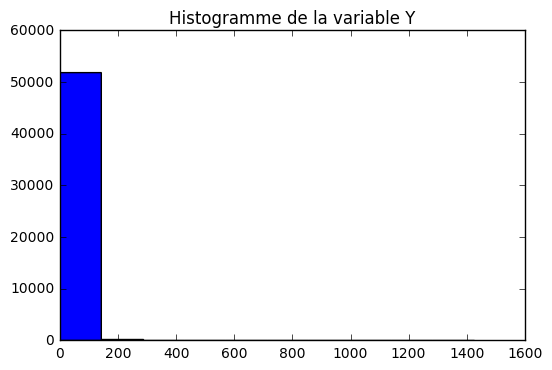

In [50]:
plt.hist(Y)
plt.title("Histogramme de la variable Y")
plt.show()

In [53]:
print("Nombre de 0 dans le vecteur Y : ", len(Y[Y!=0]))
print("Proportion de 0 dans le vecteur Y : ", len(Y[Y!=0])/len(Y))

Nombre de 0 dans le vecteur Y :  18838
Proportion de 0 dans le vecteur Y :  0.35952440025192284


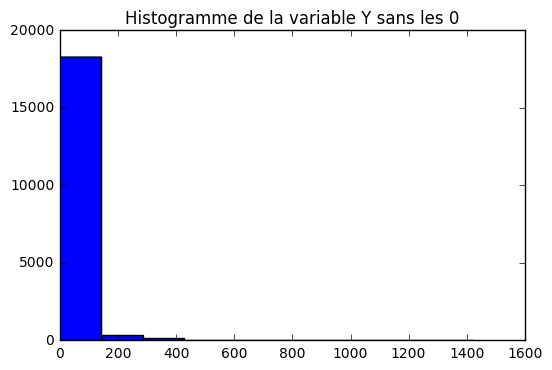

In [54]:
plt.hist(Y[Y!=0])
plt.title("Histogramme de la variable Y sans les 0")
plt.show()

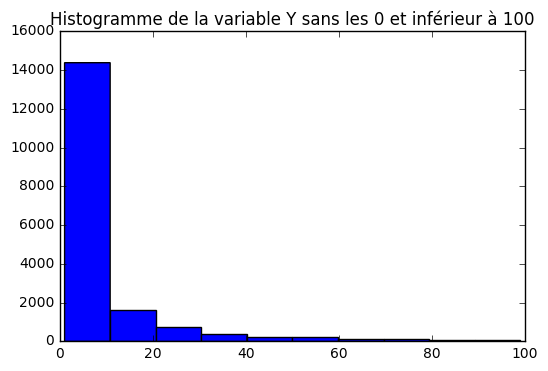

In [60]:
Y_sans0=Y[Y!=0]
plt.hist(Y_sans0[Y_sans0<100])
plt.title("Histogramme de la variable Y sans les 0 et inférieur à 100")
plt.show()

In [43]:
stats.describe(Y)
stats.describe(Data)

DescribeResult(nobs=52397, minmax=(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -6.66666700e-01,
         0.00000000e+00,  -1.25600000e+03,   0.00000000e+00,
        -1.38000000e+02,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -5.55555560e-02,   0.00000000e+00,  -2.000